# Setup 🛠️

## 0) ⬆️Upload Excel files to Google drive

## 1) 🔨Mount Google Drive

## 2) ⬆️Upload the X_train, X_test, y_train, y_test from Google Drive

## 3) 🏃‍♂️Run (Est runtime: 5h)

# ⬆️Mount Google Drive + Installs

In [25]:
from google.colab import drive
drive.mount('/content/drive')
!pip install datacollective
!pip install tqdm
!apt-get install pv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pv is already the newest version (1.6.6-1build2).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


# ⬆️Upload Train / Test sets

In [26]:
import pandas as pd
import numpy as np

X_train_path = '/content/drive/MyDrive/X_train.xlsx'
y_train_path = '/content/drive/MyDrive/y_train.xlsx'
X_test_path = '/content/drive/MyDrive/X_test.xlsx'
y_test_path = '/content/drive/MyDrive/y_test.xlsx'

X_train = pd.read_excel(X_train_path)
y_train = np.array(pd.read_excel(y_train_path).values.ravel())
X_test = pd.read_excel(X_test_path)
y_test = pd.read_excel(y_test_path)
y_test = np.array(pd.read_excel(y_test_path).values.ravel())

print("X train: ")
print(f"len: {len(X_train)}")
print(X_train)
print("------")
print("y train: ")
print(f"len: {len(y_train)}")
print(y_train)
print("------")

print("X test: ")
print(f"len: {len(X_test)}")
print(X_test)
print("------")
print(y_test)
type(y_test)
print(len(y_test))

X train: 
len: 2497
      pitch_mean  pitch_std   pitch_min   pitch_max  energy_mean  energy_std  \
0     180.453140  68.241646  125.000000  387.786194     0.078552    0.111398   
1     187.454330  70.921799  125.000000  387.786194     0.091768    0.103169   
2     209.008774  84.553490  126.452431  381.124268     0.066442    0.099848   
3     149.874771  23.129425  125.000000  198.425125     0.071948    0.111462   
4     172.244156  34.366005  125.000000  235.968582     0.085821    0.104324   
...          ...        ...         ...         ...          ...         ...   
2492  198.408722  11.819856  173.739777  227.930618     0.022558    0.026127   
2493  224.597946  27.287666  174.746246  266.400116     0.025390    0.033344   
2494  162.401459  57.785992  125.000000  357.661469     0.081452    0.095182   
2495  209.566696  20.191750  165.893967  261.823517     0.056027    0.084755   
2496  153.120667  39.264652  125.000000  255.843475     0.068846    0.074878   

      delta_energy_

# 🏆 Model Eval Function

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

def model_results(model, language1, language2, language3, test_set=True):
    # get the best params and estimator details
    print("\nbest params: ")
    print(model.best_params_)
    print("\nbest estimator: ")
    print(model.best_estimator_)
    # print("\nbest score: ")
    # print(model.best_score_)
    # print("\nmodel classes: ")
    # print(model.classes_)


    # Determine which data to use based on the eval_set parameter
    if test_set == False:
        print("\n--- Evaluating on TRAINING SET ---")
        X_data = X_train
        y_true = y_train
    else:
        print("\n--- Evaluating on TEST SET ---")
        X_data = X_test
        y_true = y_test

    # Generate predictions using the selected data
    grid_predictions = model.predict(X_data)
    labels = [language1, language2, language3]

    # Calculate and Print Metrics (Accuracy and F1 Score)
    accuracy = accuracy_score(y_true, grid_predictions)
    f1_macro = f1_score(y_true, grid_predictions, average='macro')
    print(f"\nAccuracy of the model: {accuracy:.2%}")
    print(f"F1 Macro Score: {f1_macro:.4f}")

    # Return classification report
    print(classification_report(y_true, grid_predictions, target_names=labels))

    # Generate Confusion Matrix
    cm = confusion_matrix(y_true, grid_predictions)

    # Plot Confusion Matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix')
    plt.show()

# Section 1 1️⃣
## - Use this section to compare 3 methods on the test set: (1) Using all features, (2) using PCA, (3) using Forward Feature selection (FFS) on the baseline KNN model.

## - Target metric to compare is the F1 Macro score. The method with the best F1 Macro score should be chosen


# KNN Method Search - All Feats

Fitting 5 folds for each of 8 candidates, totalling 40 fits

best params: 
{'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__n_neighbors': 35, 'knn__p': 2, 'knn__weights': 'distance'}

best estimator: 
Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=35, weights='distance'))])

--- Evaluating on TEST SET ---

Accuracy of the model: 72.27%
F1 Macro Score: 0.7090
              precision    recall  f1-score   support

    Asturian       0.71      0.58      0.64       203
    Assamese       0.71      0.79      0.75       394
       Bafut       0.76      0.73      0.74       254

    accuracy                           0.72       851
   macro avg       0.72      0.70      0.71       851
weighted avg       0.72      0.72      0.72       851



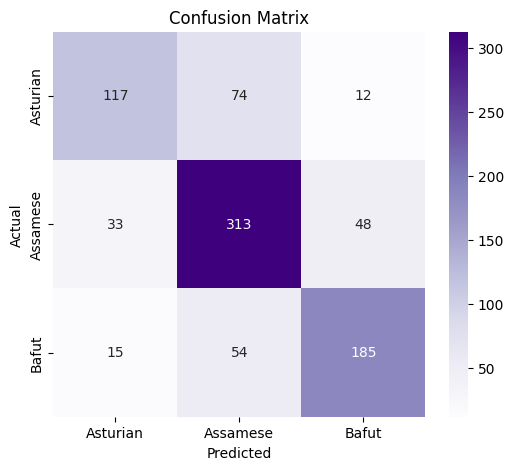

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=35, weights='distance'))])
{'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__n_neighbors': 35, 'knn__p': 2, 'knn__weights': 'distance'}


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

#pipeline ensures that the model knows to scale all train/test data it rx
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier()),
])

#parameter grid to search over
param_grid = {
    'knn__n_neighbors': [35, 37, 40, 43, 45, 49, 50, 55], #number of neighbours
    'knn__weights': ["distance"], #gives higher weight to closer classes,
    'knn__algorithm': ["auto"], #auto decides the best one to use based on the fit,
    'knn__leaf_size': [30], #mainly affects speed, not performance
    'knn__p': [2] #p = 2 means euclidean distance
}

#Define the cross validation step
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Apply grid search to search for the best model
knn_grid_search_model = GridSearchCV(pipeline,
                                 param_grid,
                                 cv=cv,
                                 verbose=10,
                                 refit=True,
                                 scoring="f1_macro",
                                 n_jobs=-1)

#train the model
knn_grid_search_model.fit(X_train, y_train)

language1 = "Asturian"
language2 = "Assamese"
language3 = "Bafut"

model_results(knn_grid_search_model, language1, language2, language3, test_set=True)
print(knn_grid_search_model.best_estimator_)
print(knn_grid_search_model.best_params_)

# KNN Method Search - PCA

Fitting 5 folds for each of 80 candidates, totalling 400 fits

best params: 
{'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__n_neighbors': 35, 'knn__p': 2, 'knn__weights': 'distance', 'pca__n_components': 0.95}

best estimator: 
Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('knn',
                 KNeighborsClassifier(n_neighbors=35, weights='distance'))])

--- Evaluating on TEST SET ---

Accuracy of the model: 71.45%
F1 Macro Score: 0.7024
              precision    recall  f1-score   support

    Asturian       0.71      0.58      0.64       203
    Assamese       0.71      0.77      0.74       394
       Bafut       0.72      0.74      0.73       254

    accuracy                           0.71       851
   macro avg       0.71      0.70      0.70       851
weighted avg       0.71      0.71      0.71       851



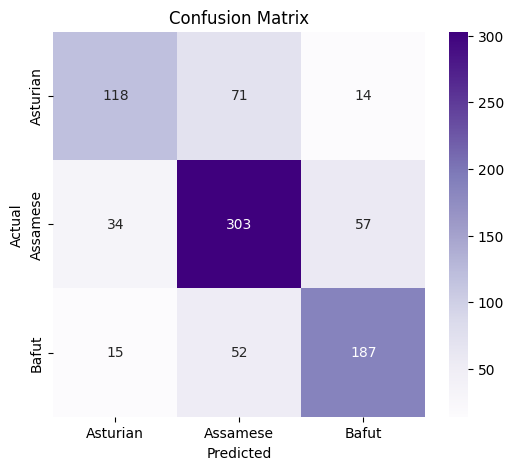

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('knn',
                 KNeighborsClassifier(n_neighbors=35, weights='distance'))])
{'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__n_neighbors': 35, 'knn__p': 2, 'knn__weights': 'distance', 'pca__n_components': 0.95}


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA

#pipeline ensures that the model knows to scale all train/test data it rx
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier()),
])

#parameter grid to search over
param_grid = {
    'pca__n_components': [0.70, 0.75, 0.85, 0.90, 0.95, 0.99, 3, 5, 10, 20], #explained variance
    'knn__n_neighbors': [35, 37, 40, 43, 45, 49, 50, 55], #number of neighbours
    'knn__weights': ["distance"], #gives higher weight to closer classes,
    'knn__algorithm': ["auto"], #auto decides the best one to use based on the fit,
    'knn__leaf_size': [30], #mainly affects speed, not performance
    'knn__p': [2] #p = 2 means euclidean distance
}

#Define the cross validation step
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Apply grid search to search for the best model
knn_grid_search_model = GridSearchCV(pipeline,
                                 param_grid,
                                 cv=cv,
                                 verbose=10,
                                 refit=True,
                                 scoring="f1_macro",
                                 n_jobs=-1)

#train the model
knn_grid_search_model.fit(X_train, y_train)

language1 = "Asturian"
language2 = "Assamese"
language3 = "Bafut"

model_results(knn_grid_search_model, language1, language2, language3, test_set=True)
print(knn_grid_search_model.best_estimator_)
print(knn_grid_search_model.best_params_)

# KNN Method Search - FFS
## ⚠️This can take up to 4 hours to run

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Nested CV F1-macro: 0.9505712436038124 ± 0.011204080536670206
Fitting 5 folds for each of 8 candidates, totalling 40 fits

best params: 
{'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__n_neighbors': 35, 'knn__p': 2, 'knn__weights': 'distance'}

best estimator: 
Pipeline(steps=[('scaler', StandardScaler()),
                ('sfs',
                 SequentialFeatureSelector(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                                           estimator=KNeighborsClassifier(),
                                           n_jobs=-1, scoring='f1_macro',
                                           tol=0.001)),
                ('knn',
                 KNeighb

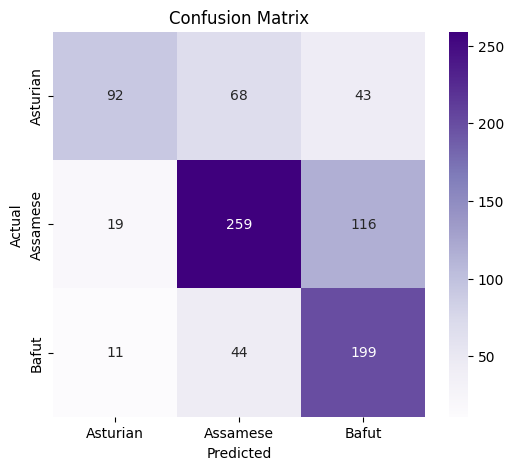

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Define a pipeline where feature selection + hyperparameter tuning happens inside
def create_pipeline():
    return Pipeline([
        ('scaler', StandardScaler()),
        ('sfs', SequentialFeatureSelector(
            estimator=KNeighborsClassifier(),
            n_features_to_select='auto',
            tol=0.001,
            direction='forward',
            scoring='f1_macro',
            cv=inner_cv,
            n_jobs=-1
        )),
        ('knn', KNeighborsClassifier())
    ])

#param grid to search over
param_grid = {
    'knn__n_neighbors': [35, 37, 40, 43, 45, 49, 50, 55], #number of neighbours
    'knn__weights': ["distance"], #gives higher weight to closer classes,
    'knn__algorithm': ["auto"], #auto decides the best one to use based on the fit,
    'knn__leaf_size': [30], #mainly affects speed, not performance
    'knn__p': [2] #p = 2 means euclidean distance
}

#define the grid search cv
knn_nested_pipeline = GridSearchCV(
    estimator=create_pipeline(),
    param_grid=param_grid,
    cv=inner_cv,
    verbose=10,
    scoring="f1_macro",
    n_jobs=-1
)

# This gives you an unbiased estimate. Simply finds a cv score on training data
cv_scores = cross_val_score(knn_nested_pipeline, X_train, y_train, cv=outer_cv, scoring='f1_macro')
print("Nested CV F1-macro:", cv_scores.mean(), "±", cv_scores.std())

# Fit on full training set
knn_nested_pipeline.fit(X_train, y_train)

language1 = "Asturian"
language2 = "Assamese"
language3 = "Bafut"

model_results(knn_nested_pipeline, language1, language2, language3, test_set=True)

# Section 2 2️⃣

## - In this section we compare KNN, RF, LDA, and QDA on the train and test set.

## - Models: K Nearest Neighbors (KNN), Random Forest (RF), Linear Discriminant Analysis (LDA), Quadratic Discriminant Analysis (QDA)

# KNN Search ✅

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

#pipeline ensures that the model knows to scale all train/test data it rx
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier()),
])

#parameter grid to search over
param_grid = {
    'knn__n_neighbors': [35, 37, 40, 43, 45, 49, 50, 55], #number of neighbours
    'knn__weights': ["distance"], #gives higher weight to closer classes,
    'knn__algorithm': ["auto"], #auto decides the best one to use based on the fit,
    'knn__leaf_size': [30], #mainly affects speed, not performance
    'knn__p': [2] #p = 2 means euclidean distance
}

#Define the cross validation step
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Apply grid search to search for the best model
knn_grid_search_model = GridSearchCV(pipeline,
                                 param_grid,
                                 cv=cv,
                                 verbose=10,
                                 refit=True,
                                 scoring="f1_macro",
                                 n_jobs=-1)

#train the model
knn_grid_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['auto'], 'knn__leaf_size': [30],
                         'knn__n_neighbors': [35, 37, 40, 43, 45, 49, 50, 55],
                         'knn__p': [2], 'knn__weights': ['distance']},
             scoring='f1_macro', verbose=10)

# 🏆KNN Search Train Eval ✅


best params: 
{'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__n_neighbors': 35, 'knn__p': 2, 'knn__weights': 'distance'}

best estimator: 
Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=35, weights='distance'))])

--- Evaluating on TRAINING SET ---

Accuracy of the model: 100.00%
F1 Macro Score: 1.0000
              precision    recall  f1-score   support

    Asturian       1.00      1.00      1.00       547
    Assamese       1.00      1.00      1.00      1438
       Bafut       1.00      1.00      1.00       512

    accuracy                           1.00      2497
   macro avg       1.00      1.00      1.00      2497
weighted avg       1.00      1.00      1.00      2497



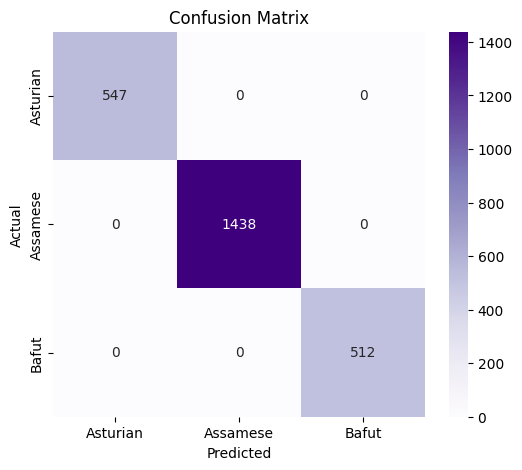

In [31]:
language1 = "Asturian"
language2 = "Assamese"
language3 = "Bafut"

model_results(knn_grid_search_model, language1, language2, language3, test_set=False)

# 🏆KNN Search Test Eval ✅


best params: 
{'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__n_neighbors': 35, 'knn__p': 2, 'knn__weights': 'distance'}

best estimator: 
Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=35, weights='distance'))])

--- Evaluating on TEST SET ---

Accuracy of the model: 72.27%
F1 Macro Score: 0.7090
              precision    recall  f1-score   support

    Asturian       0.71      0.58      0.64       203
    Assamese       0.71      0.79      0.75       394
       Bafut       0.76      0.73      0.74       254

    accuracy                           0.72       851
   macro avg       0.72      0.70      0.71       851
weighted avg       0.72      0.72      0.72       851



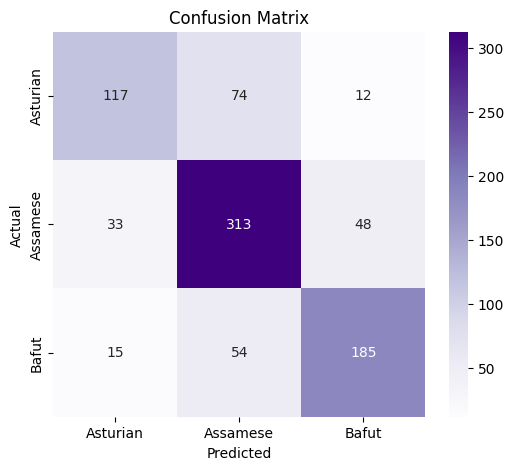

In [32]:
language1 = "Asturian"
language2 = "Assamese"
language3 = "Bafut"

model_results(knn_grid_search_model, language1, language2, language3, test_set=True)

# RF Search ✅

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

#pipeline ensures that the model knows to scale all train/test data it rx
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rfc', RandomForestClassifier(random_state=42))
])

#parameter grid
param_grid = {
    'rfc__min_samples_leaf' : [1,3,5], #set this between 1-5 for optimal generalization
    'rfc__n_estimators': [100, 300, 500], #the number of decision trees in the forest. More trees = longer compute. 100-500 is optimal
    'rfc__max_features': ['sqrt', 'log2'], #num feats to consider when splitting a node. sqrt,log2 help balance bias and variance
    'rfc__criterion' : ["gini", "entropy", "log_loss"],
    'rfc__max_depth' : [10, 20, 30], #How deep the tree is. The deeper, the better but can overfit. 10-30 is recommended
}

#Define the cross validation step
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Apply grid search to search for the best model
rf_grid_search_model = GridSearchCV(pipeline,
                                 param_grid,
                                 cv=cv,
                                 verbose=10,
                                 refit=True,
                                 scoring="f1_macro",
                                 n_jobs=-1) #was -1

#train the model
rf_grid_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rfc__criterion': ['gini', 'entropy', 'log_loss'],
                         'rfc__max_depth': [10, 20, 30],
                         'rfc__max_features': ['sqrt', 'log2'],
                         'rfc__min_samples_leaf': [1, 3, 5],
                         'rfc__n_estimators': [100, 300, 500]},
             scoring='f1_macro', verbose=10)

# 🏆RF Training Eval ✅


best params: 
{'rfc__criterion': 'entropy', 'rfc__max_depth': 20, 'rfc__max_features': 'sqrt', 'rfc__min_samples_leaf': 1, 'rfc__n_estimators': 300}

best estimator: 
Pipeline(steps=[('scaler', StandardScaler()),
                ('rfc',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        n_estimators=300, random_state=42))])

--- Evaluating on TRAINING SET ---

Accuracy of the model: 100.00%
F1 Macro Score: 1.0000
              precision    recall  f1-score   support

    Asturian       1.00      1.00      1.00       547
    Assamese       1.00      1.00      1.00      1438
       Bafut       1.00      1.00      1.00       512

    accuracy                           1.00      2497
   macro avg       1.00      1.00      1.00      2497
weighted avg       1.00      1.00      1.00      2497



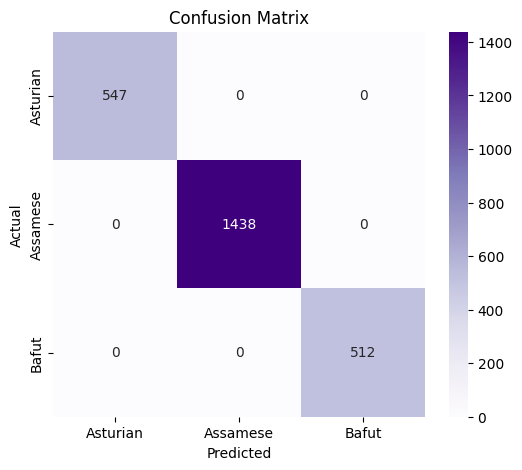

In [34]:
language1 = "Asturian"
language2 = "Assamese"
language3 = "Bafut"

model_results(rf_grid_search_model, language1, language2, language3, test_set=False)

# 🏆RF Test Eval ✅


best params: 
{'rfc__criterion': 'entropy', 'rfc__max_depth': 20, 'rfc__max_features': 'sqrt', 'rfc__min_samples_leaf': 1, 'rfc__n_estimators': 300}

best estimator: 
Pipeline(steps=[('scaler', StandardScaler()),
                ('rfc',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        n_estimators=300, random_state=42))])

--- Evaluating on TEST SET ---

Accuracy of the model: 66.75%
F1 Macro Score: 0.6270
              precision    recall  f1-score   support

    Asturian       0.67      0.33      0.44       203
    Assamese       0.67      0.72      0.69       394
       Bafut       0.66      0.86      0.75       254

    accuracy                           0.67       851
   macro avg       0.67      0.64      0.63       851
weighted avg       0.67      0.67      0.65       851



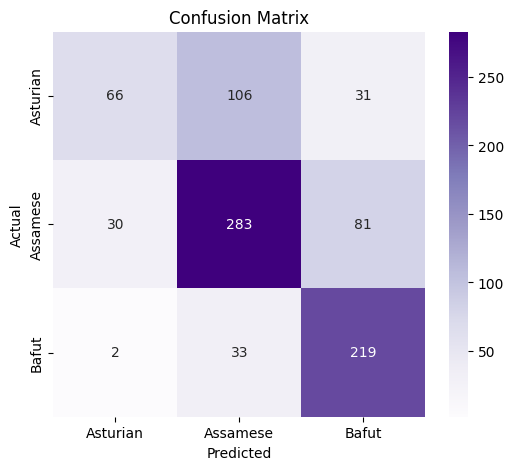

In [35]:
language1 = "Asturian"
language2 = "Assamese"
language3 = "Bafut"

model_results(rf_grid_search_model, language1, language2, language3, test_set=True)

# LDA ✅

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#pipeline ensures that the model knows to scale all train/test data it rx
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis()),
])

#parameter grid to search over
param_grid = {
    'lda__n_components': [1,2], #number of components. Capped at num_classes - 1
    }

#Define the cross validation step
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Apply grid search to search for the best model
lda_grid_search_model = GridSearchCV(pipeline,
                                 param_grid,
                                 cv=cv,
                                 verbose=10,
                                 refit=True,
                                 scoring="f1_macro",
                                 n_jobs=-1)

#train the model
lda_grid_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lda', LinearDiscriminantAnalysis())]),
             n_jobs=-1, param_grid={'lda__n_components': [1, 2]},
             scoring='f1_macro', verbose=10)

# 🏆LDA Search Train Eval ✅


best params: 
{'lda__n_components': 1}

best estimator: 
Pipeline(steps=[('scaler', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis(n_components=1))])

--- Evaluating on TRAINING SET ---

Accuracy of the model: 98.20%
F1 Macro Score: 0.9787
              precision    recall  f1-score   support

    Asturian       0.98      0.97      0.98       547
    Assamese       0.98      0.99      0.99      1438
       Bafut       0.99      0.96      0.97       512

    accuracy                           0.98      2497
   macro avg       0.98      0.98      0.98      2497
weighted avg       0.98      0.98      0.98      2497



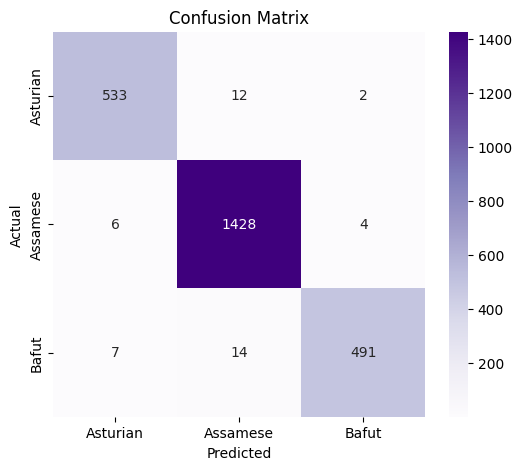

In [37]:
language1 = "Asturian"
language2 = "Assamese"
language3 = "Bafut"

model_results(lda_grid_search_model, language1, language2, language3, test_set=False)

# 🏆LDA Search Test Eval ✅


best params: 
{'lda__n_components': 1}

best estimator: 
Pipeline(steps=[('scaler', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis(n_components=1))])

--- Evaluating on TEST SET ---

Accuracy of the model: 76.50%
F1 Macro Score: 0.7599
              precision    recall  f1-score   support

    Asturian       0.71      0.70      0.71       203
    Assamese       0.83      0.70      0.76       394
       Bafut       0.73      0.92      0.81       254

    accuracy                           0.76       851
   macro avg       0.76      0.77      0.76       851
weighted avg       0.77      0.76      0.76       851



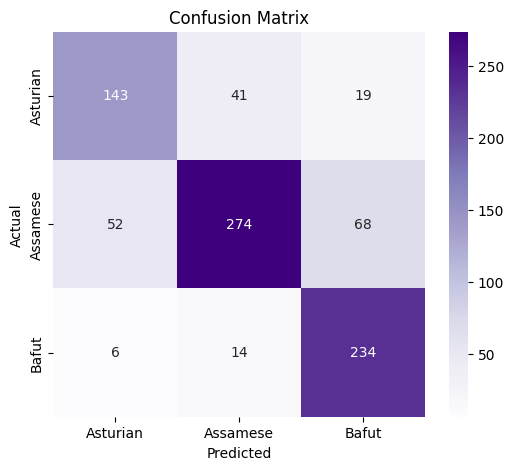

In [38]:
language1 = "Asturian"
language2 = "Assamese"
language3 = "Bafut"

model_results(lda_grid_search_model, language1, language2, language3, test_set=True)

# QDA ✅

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#pipeline ensures that the model knows to scale all train/test data it rx
qda_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('qda', QuadraticDiscriminantAnalysis()),
])

#parameter grid to search over
param_grid = {
    'qda__reg_param': [0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], #number of components. Capped at num_classes - 1
    }

#Define the cross validation step
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Apply grid search to search for the best model
qda_grid_search_model = GridSearchCV(qda_pipeline,
                                 param_grid,
                                 cv=cv,
                                 verbose=10,
                                 refit=True,
                                 scoring="f1_macro",
                                 n_jobs=-1)

#train the model
qda_grid_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('qda',
                                        QuadraticDiscriminantAnalysis())]),
             n_jobs=-1,
             param_grid={'qda__reg_param': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                            0.7, 0.8, 0.9, 1]},
             scoring='f1_macro', verbose=10)

# 🏆QDA Train Eval ✅


best params: 
{'qda__reg_param': 0.1}

best estimator: 
Pipeline(steps=[('scaler', StandardScaler()),
                ('qda', QuadraticDiscriminantAnalysis(reg_param=0.1))])

--- Evaluating on TRAINING SET ---

Accuracy of the model: 99.16%
F1 Macro Score: 0.9900
              precision    recall  f1-score   support

    Asturian       0.99      1.00      0.99       547
    Assamese       0.99      0.99      0.99      1438
       Bafut       0.99      0.98      0.98       512

    accuracy                           0.99      2497
   macro avg       0.99      0.99      0.99      2497
weighted avg       0.99      0.99      0.99      2497



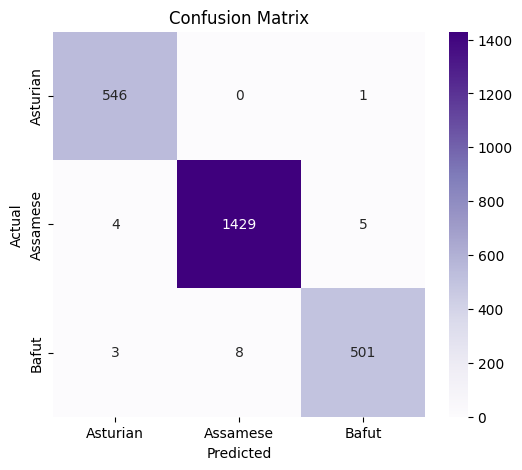

In [40]:
language1 = "Asturian"
language2 = "Assamese"
language3 = "Bafut"

model_results(qda_grid_search_model, language1, language2, language3, test_set=False)

# 🏆QDA Test Eval ✅


best params: 
{'qda__reg_param': 0.1}

best estimator: 
Pipeline(steps=[('scaler', StandardScaler()),
                ('qda', QuadraticDiscriminantAnalysis(reg_param=0.1))])

--- Evaluating on TEST SET ---

Accuracy of the model: 69.80%
F1 Macro Score: 0.6872
              precision    recall  f1-score   support

    Asturian       0.70      0.57      0.63       203
    Assamese       0.80      0.65      0.72       394
       Bafut       0.60      0.87      0.71       254

    accuracy                           0.70       851
   macro avg       0.70      0.70      0.69       851
weighted avg       0.72      0.70      0.70       851



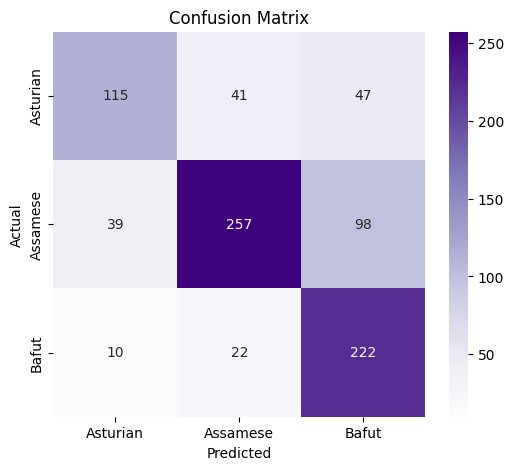

In [41]:
language1 = "Asturian"
language2 = "Assamese"
language3 = "Bafut"

model_results(qda_grid_search_model, language1, language2, language3, test_set=True)

# Section 3 3️⃣

## - Model comparisons are performed using the Wilcoxon signed-rank test

# KNN vs LDA

In [42]:
from scipy.stats import wilcoxon
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Prepare models and select your CV method
knn = knn_grid_search_model.best_estimator_
lda = lda_grid_search_model.best_estimator_

cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

#Get the CV scores
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='f1_macro')
lda_cv_scores = cross_val_score(lda, X_train, y_train, cv=cv, scoring='f1_macro')

# Calculate p value
stat, p = wilcoxon(knn_cv_scores, lda_cv_scores, zero_method='zsplit')
print(f"p-value: {p}")
if p > 0.05:
  print("H0: there is no significant difference between knn and lda performance")
else:
  print("H: P < 0.05. Reject the null hypothesis. There is a significant difference between knn and lda")

p-value: 1.9073486328125e-06
H: P < 0.05. Reject the null hypothesis. There is a significant difference between knn and lda


# RF vs LDA

In [43]:
from scipy.stats import wilcoxon
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Prepare models and select your CV method
rf = rf_grid_search_model.best_estimator_
lda = lda_grid_search_model.best_estimator_

cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

#Get the CV scores
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring='f1_macro',n_jobs=-1)
lda_cv_scores = cross_val_score(lda, X_train, y_train, cv=cv, scoring='f1_macro',n_jobs=-1)

# Calculate p value
stat, p = wilcoxon(rf_cv_scores, lda_cv_scores, zero_method='zsplit')
print(f"p-value: {p}")
if p > 0.05:
  print("H0: there is no significant difference between rf and lda performance")
else:
  print("H: P < 0.05. Reject the null hypothesis. There is a significant difference between rf and lda")

p-value: 0.8408222198486328
H0: there is no significant difference between rf and lda performance


# QDA vs LDA

In [44]:
from scipy.stats import wilcoxon
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Prepare models and select your CV method
qda = qda_grid_search_model.best_estimator_
lda = lda_grid_search_model.best_estimator_

cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

#Get the CV scores
qda_cv_scores = cross_val_score(qda, X_train, y_train, cv=cv, scoring='f1_macro')
lda_cv_scores = cross_val_score(lda, X_train, y_train, cv=cv, scoring='f1_macro')

# Calculate p value
stat, p = wilcoxon(qda_cv_scores, lda_cv_scores, zero_method='zsplit')
print(f"p-value: {p}")
if p > 0.05:
  print("H0: there is no significant difference between qda and lda performance")
else:
  print("H: P < 0.05. Reject the null hypothesis. There is a significant difference between qda and lda")

p-value: 0.40909767150878906
H0: there is no significant difference between qda and lda performance
